<a href="https://colab.research.google.com/github/Gayatri8-sys/Machine-Learning/blob/main/MLR_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.dtypes

,0
Price,int64
Age_08_04,int64
KM,int64
Fuel_Type,object
HP,int64
Automatic,int64
cc,int64
Doors,int64
Cylinders,int64
Gears,int64


In [ ]:
df.drop(columns='Fuel_Type')

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025
1432,10845,72,19000,86,0,1300,3,4,5,1015
1433,8500,71,17016,86,0,1300,3,4,5,1015
1434,7250,70,16916,86,0,1300,3,4,5,1015


In [ ]:
df.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
df.nunique()

,0
Price,236
Age_08_04,77
KM,1263
Fuel_Type,3
HP,12
Automatic,2
cc,13
Doors,4
Cylinders,1
Gears,4


In [ ]:
df.rename(columns={'Age_08_04':'Age'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age        1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


<Axes: >

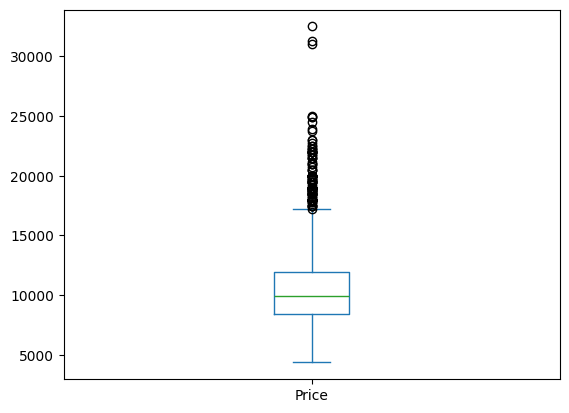

In [ ]:
df.Price.plot(kind='box')

<Axes: >

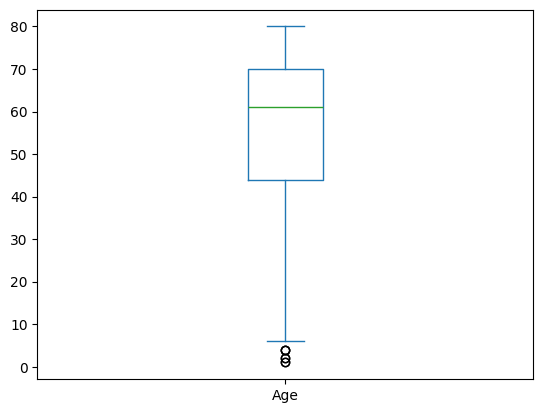

In [ ]:
df.Age.plot(kind='box')

<Axes: >

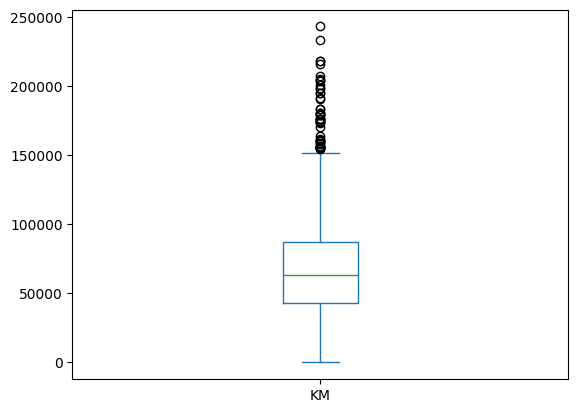

In [ ]:
df.KM.plot(kind='box')

In [ ]:
# apply IQR method for outlier for multiple col

cols=df.select_dtypes(include=('int64','float64')).columns

In [ ]:
cols

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Weight'],
      dtype='object')

In [ ]:
for col in cols:
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-(1.5*IQR)
  upper_limit=Q3+(1.5*IQR)
  df=df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]

In [ ]:
df       # outliers removed

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105
18,16750,24,25563,Petrol,110,0,1600,3,4,5,1065
19,16950,30,64359,Petrol,110,0,1600,3,4,5,1105
20,15950,30,67660,Petrol,110,0,1600,3,4,5,1105
22,15950,28,56349,Petrol,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


<Axes: >

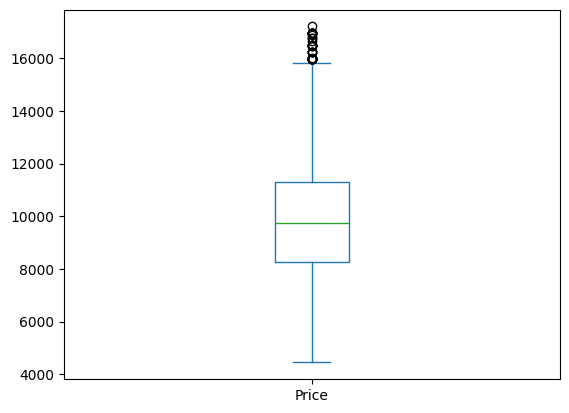

In [ ]:
df.Price.plot(kind='box')

In [ ]:
df.shape

(1080, 11)

In [ ]:
df.head(10)

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
9,12950,23,71138,Diesel,69,0,1900,3,4,5,1105
18,16750,24,25563,Petrol,110,0,1600,3,4,5,1065
19,16950,30,64359,Petrol,110,0,1600,3,4,5,1105
20,15950,30,67660,Petrol,110,0,1600,3,4,5,1105
22,15950,28,56349,Petrol,110,0,1600,3,4,5,1120
23,16950,28,32220,Petrol,110,0,1600,3,4,5,1120
24,16250,29,25813,Petrol,110,0,1600,3,4,5,1120
25,15950,25,28450,Petrol,110,0,1600,3,4,5,1120
27,15750,29,41415,Petrol,110,0,1600,3,4,5,1120
28,16950,28,44142,Petrol,110,0,1600,3,4,5,1120


In [ ]:
df.drop(columns='Fuel_Type',inplace=True)

In [ ]:

df.reset_index()

,index,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,9,12950,23,71138,69,0,1900,3,4,5,1105
1,18,16750,24,25563,110,0,1600,3,4,5,1065
2,19,16950,30,64359,110,0,1600,3,4,5,1105
3,20,15950,30,67660,110,0,1600,3,4,5,1105
4,22,15950,28,56349,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...
1075,1431,7500,69,20544,86,0,1300,3,4,5,1025
1076,1432,10845,72,19000,86,0,1300,3,4,5,1015
1077,1433,8500,71,17016,86,0,1300,3,4,5,1015
1078,1434,7250,70,16916,86,0,1300,3,4,5,1015


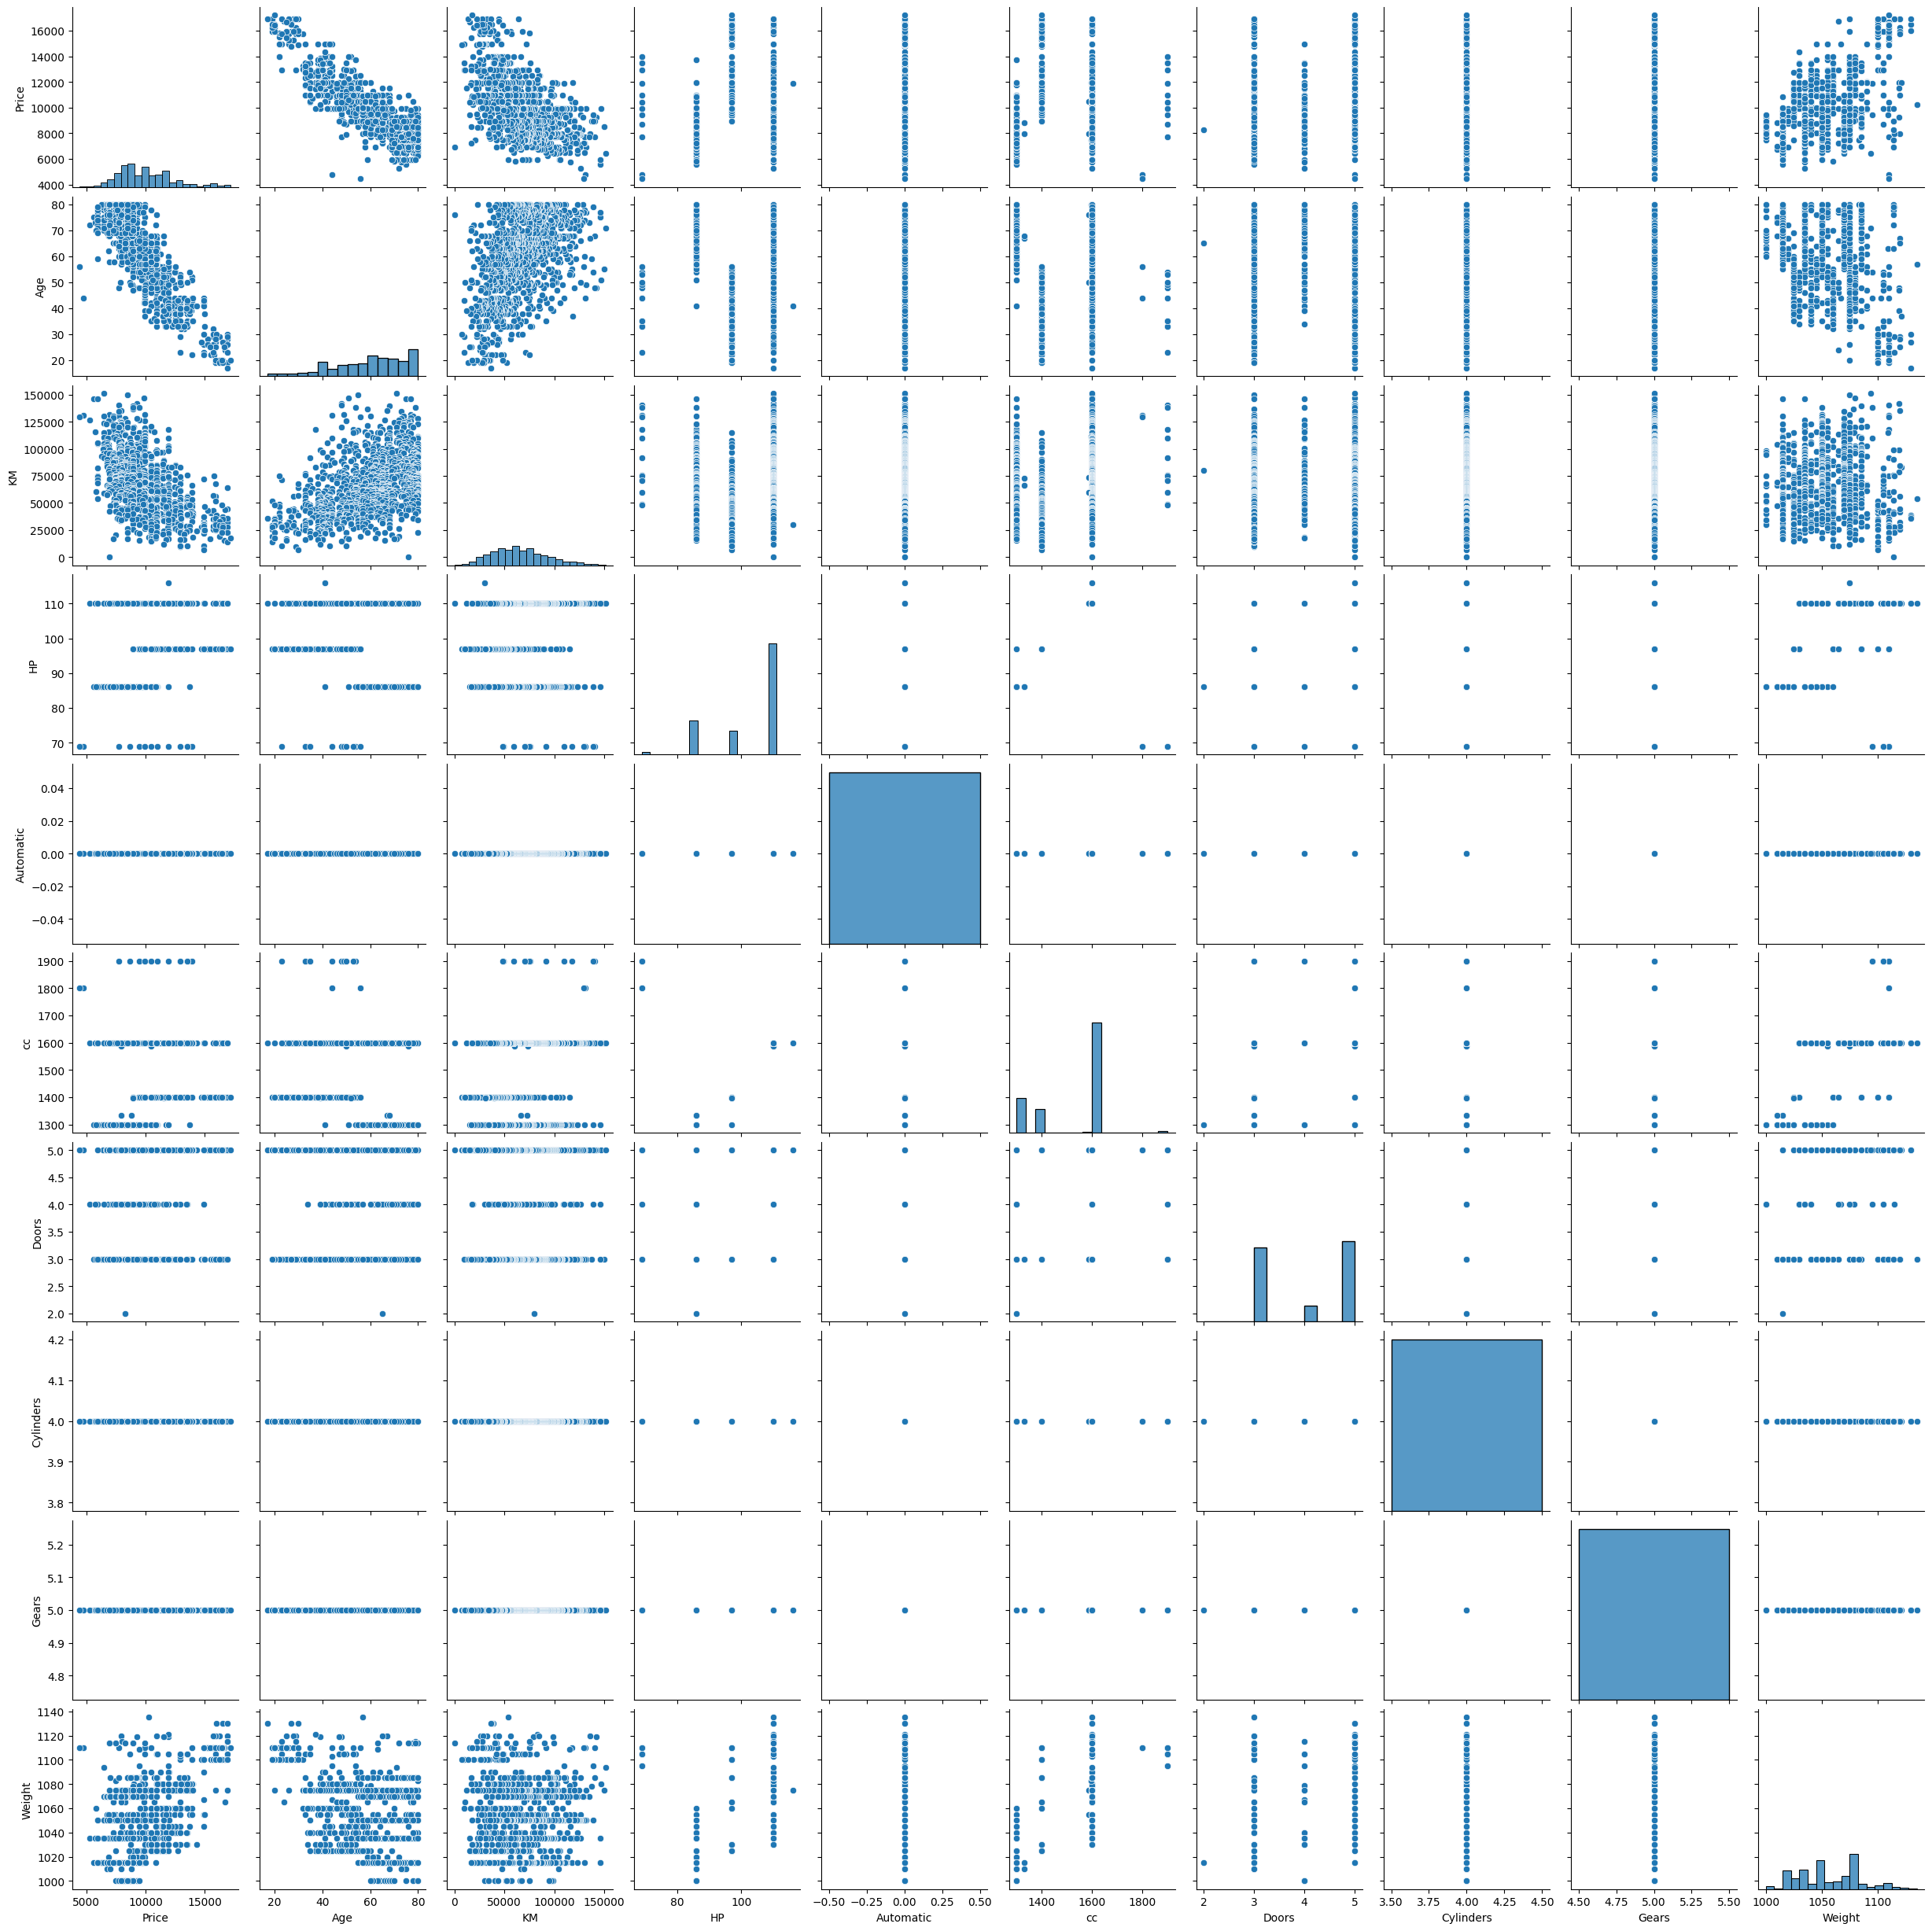

In [ ]:
# correlation

import seaborn as sns

sns.pairplot(df)

In [ ]:
correlation=df.corr(numeric_only=True)
correlation

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.863165,-0.538055,0.129098,NaN,0.105318,0.170246,NaN,NaN,0.476929
Age,-0.863165,1.000000,0.478279,-0.008785,NaN,-0.045288,-0.087293,NaN,NaN,-0.372068
KM,-0.538055,0.478279,1.000000,-0.000352,NaN,0.108261,0.000442,NaN,NaN,-0.066894
HP,0.129098,-0.008785,-0.000352,1.000000,NaN,0.755934,0.216270,NaN,NaN,0.451570
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.105318,-0.045288,0.108261,0.755934,NaN,1.000000,0.197294,NaN,NaN,0.584167
Doors,0.170246,-0.087293,0.000442,0.216270,NaN,0.197294,1.000000,NaN,NaN,0.530479
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.476929,-0.372068,-0.066894,0.451570,NaN,0.584167,0.530479,NaN,NaN,1.000000


<Axes: >

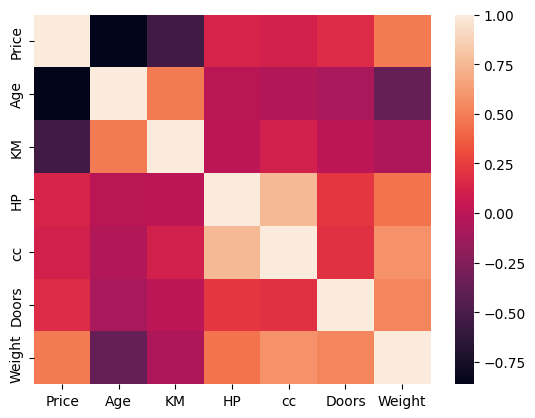

In [ ]:
sns.heatmap(correlation.drop(index=['Cylinders', 'Gears', 'Automatic'],columns=['Cylinders', 'Gears', 'Automatic']))

In [ ]:
# age, price, km are highly correlted with each other for this data

<ipython-input-72-105989703>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], bins=8)


<Axes: xlabel='Price', ylabel='Density'>

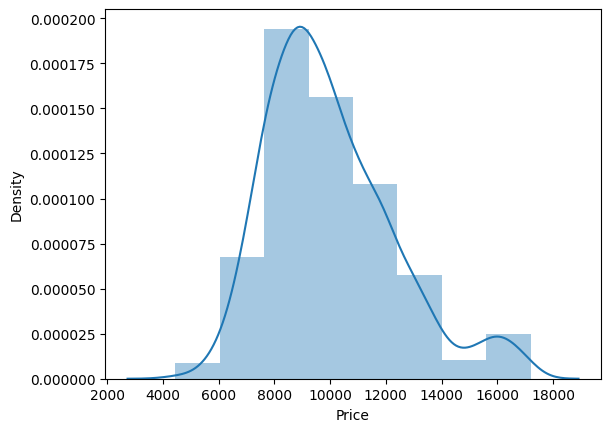

In [ ]:
sns.distplot(df['Price'], bins=8)

In [ ]:
# splitting dataset

from sklearn.model_selection import train_test_split


X=df.drop(columns='Price')
Y=df['Price']

In [ ]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, shuffle=True)

In [ ]:
X_train

,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
19,30,64359,110,0,1600,3,4,5,1105
327,33,33591,110,0,1600,5,4,5,1075
1094,77,126000,110,0,1600,5,4,5,1050
602,52,31000,97,0,1398,3,4,5,1025
806,58,72928,110,0,1600,5,4,5,1075
...,...,...,...,...,...,...,...,...,...
743,61,82115,110,0,1600,3,4,5,1055
1199,69,89096,110,0,1600,5,4,5,1085
884,58,61343,110,0,1600,5,4,5,1075
1198,75,89507,86,0,1300,3,4,5,1015


# Model 1

In [ ]:
from sklearn.linear_model import LinearRegression

# model 1


model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
model.predict(X_test)

array([11399.13084268,  7418.60867629, 10161.6633274 ,  7760.63752128,
       15768.55706206,  8513.23713754,  8286.52268415,  8938.13742404,
        7944.90890103, 10905.54989004,  7773.59135397,  7788.04930555,
        7198.52752108, 12152.73774897,  7220.70547864,  9787.15831505,
        8543.69588624, 11852.27952256, 10948.24533007,  9322.65696771,
       10942.12089842, 11671.70472943,  9481.12906444,  9168.98762562,
        7858.81043392, 15047.7492568 , 11269.47616779,  9156.04610818,
       11013.79249396,  8691.17424867, 10824.56179874,  7702.35144691,
        8381.61074809,  8273.91815401,  9122.05940757, 12408.00730939,
        9835.49456184, 11103.28235563, 12217.61209822,  9731.99668027,
       10783.74980258,  8116.95184362, 10879.02865377,  7533.02862792,
       11437.34243443,  7617.40231863,  9456.17236127, 11074.06668166,
       13021.0370613 , 12547.84770584,  7449.75944825, 12707.97546819,
       10374.63418581,  8420.9555546 , 10698.92742745,  8203.11561344,
      

In [ ]:
Y_test

,Price
512,13950
1135,5950
531,10250
1268,8950
130,16250
...,...
373,13250
1357,7900
789,8950
372,11950


In [ ]:
model.score(X_test,Y_test)          # 79% accuracy

0.7999184318266774

In [ ]:
data=pd.DataFrame({'Actual Price': Y_test, 'Predicted Price': model.predict(X_test)})

In [ ]:
data

,Actual Price,Predicted Price
512,13950,11399.130843
1135,5950,7418.608676
531,10250,10161.663327
1268,8950,7760.637521
130,16250,15768.557062
...,...,...
373,13250,14113.585298
1357,7900,8239.420328
789,8950,9729.049333
372,11950,12836.067210


In [ ]:
df=df['Age'].nunique

In [ ]:
coeff = pd.DataFrame({"Features": X_train.columns, "Coefficients": model.coef_})

In [ ]:
coeff

,Features,Coefficients
0,Age,-1.032317e+02
1,KM,-1.452725e-02
2,HP,2.689891e+01
3,Automatic,-3.819167e-13
4,cc,-2.812962e+00
5,Doors,-8.767961e+01
6,Cylinders,0.000000e+00
7,Gears,0.000000e+00
8,Weight,2.188263e+01


# Model 2

In [ ]:
# model 2 --- selecting features with high correlatiojn only

df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")


In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df=df.rename(columns={'Age_08_04':'Age'})

In [ ]:
X1 = df[['Age','KM']]    # these col are highly correlated

In [ ]:
Y1=df['Price']

In [ ]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=20)

In [ ]:
from sklearn.linear_model import LinearRegression
model2=LinearRegression()

In [ ]:
model2.fit(X1_train, Y1_train)

LinearRegression()

In [ ]:
Y1_pred=model2.predict(X1_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(Y1_test, Y1_pred)

0.7730850122602697

In [ ]:
pedicted = pd.DataFrame({'Actual value':Y1_test, 'Predicted value':Y1_pred})

In [ ]:
pedicted

,Actual value,Predicted value
83,17950,15408.203515
1129,7750,7770.435124
1368,9750,8741.129411
522,9650,11478.371766
318,9900,13379.195394
...,...,...
244,11690,14426.479761
280,12950,14300.021110
1398,8950,8129.178108
251,10850,12936.289617


# Model 3

In [ ]:
# model3 ---- with standardization

In [ ]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
X3=df.drop(['Price','Fuel_Type'], axis=1)

In [ ]:
Y3=df['Price']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2)

In [ ]:
scaler=StandardScaler()
X3_train_scaled=scaler.fit_transform(X3_train)

In [ ]:
X3_test_scaled=scaler.fit_transform(X3_test)

In [ ]:
# only features are standardized, as it is incorrect to scale target variables

In [ ]:
model3=LinearRegression()

In [ ]:
model3.fit(X3_train_scaled, Y3_train)

LinearRegression()

In [ ]:
Y3_pred = model3.predict(X3_test_scaled)

In [ ]:
predicted3 = pd.DataFrame({'Actual value':Y3_test, 'Predicted value':Y3_pred})

In [ ]:
predicted3

,Actual value,Predicted value
1376,7800,8651.395564
773,10950,9491.058948
1308,7950,6745.280343
841,8800,7681.955665
1231,6750,8126.170780
...,...,...
1404,8500,8387.321264
397,12450,12458.095880
1237,5950,6185.884634
227,11690,13337.618482


In [ ]:
r2_score(Y3_test, Y3_pred)

0.8144121757575196

In [ ]:
# model3 accuracy is 81%

# Lasso and Ridge


Regularization is a technique used to reduce model complexity and prevent overfitting by adding a penalty to large coefficients in a regression model.

Lasso and Ridge are regularized linear regression techniques that help prevent overfitting and can improve prediction accuracy.



In [ ]:
# Ridge

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
ridge=Ridge(alpha=1.0)

In [ ]:
# for model 1
ridge.fit(X_train, Y_train)

Ridge()

In [ ]:
r1_predict=ridge.predict(X_test)

In [ ]:
r2_score(Y_test, r1_predict)

0.79992671746638

In [ ]:
# for model 2
ridge.fit(X1_train, Y1_train)

Ridge()

In [ ]:
r2_predict=ridge.predict(X1_test)

In [ ]:
r2_score(Y1_test, r2_predict)

0.7730849404581013

In [ ]:
# for model 3

ridge.fit(X3_train_scaled, Y3_train)

Ridge()

In [ ]:
r3_predict=ridge.predict(X3_test_scaled)

In [ ]:
r2_score(Y3_test, r3_predict)

0.8144358680227989

In [ ]:
# apply lasso for all three models

In [ ]:
# for model 1

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)

In [ ]:
lasso.fit(X_train, Y_train)
l1_predict=lasso.predict(X_test)

r2_score(Y_test, l1_predict)

0.8000037894214992

In [ ]:
# for model2

lasso.fit(X1_train, Y1_train)
l2_predict=lasso.predict(X1_test)

r2_score(Y1_test, l2_predict)

0.7730851198098911

In [ ]:
# for model 3

lasso.fit(X3_train_scaled, Y3_train)
l3_predict=lasso.predict(X3_test_scaled)

r2_score(Y3_test, l3_predict)

0.8144505500418144